In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [80]:
TRAIN_DATA_PATH = "data/Q1_train.csv"
TEST_DATA_PATH = "data/Q1_test.csv"

SIZE_IN_ROW = 28
VALIDATION_PERCNTAGE = 0.1

LABELS = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',
          12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',
          19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}


WIDTH = 28
HEIGHT = 28

In [81]:
all_data = pd.read_csv(TRAIN_DATA_PATH,index_col=False)
test_data = pd.read_csv(TEST_DATA_PATH,index_col=False)

In [82]:
all_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [83]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [84]:
# for data in [(index,data) for index, data in test_data.iterrows() if index in range(25)]:
#     plt.imshow(np.array(data[1][1:]).reshape(WIDTH,HEIGHT),cmap='gray')
#     plt.title(LABELS[data[1][0]])
#     plt.show()


In [85]:
## random shuffling first time
all_data = all_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

In [86]:
data_length = all_data.shape[0]
test_data_length = test_data.shape[0]
print(data_length)
validation_data_length = int(data_length * VALIDATION_PERCNTAGE)
train_data_length = data_length - validation_data_length

print(train_data_length,validation_data_length)

27455
24710 2745


In [87]:
y_labels = all_data['label']
all_data = all_data.drop('label',1)

y_test_labels = test_data['label']
test_data = test_data.drop('label',1)

/tmp/ipykernel_66359/898471678.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_data = all_data.drop('label',1)
/tmp/ipykernel_66359/898471678.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data = test_data.drop('label',1)


In [88]:
a = np.array([[1,2],[3,4]])
print(2*(a/4 - 0.5))

[[-0.5  0. ]
 [ 0.5  1. ]]


In [89]:
## DATA normalization

x_train = 2 * (all_data.copy().values[:train_data_length].astype(np.float32)/255 - 0.5)
_y_train = y_labels.copy()[:train_data_length]


x_valid = 2 * (all_data.copy().values[train_data_length:].astype(np.float32)/255 - 0.5)
_y_valid = y_labels.copy().values[train_data_length:]


y_train =  tf.Session().run(tf.one_hot(_y_train,25))
y_valid =  tf.Session().run(tf.one_hot(_y_valid,25))

x_test = 2 * (test_data.copy().values.astype(np.float32)/255 - 0.5)
y_test = tf.Session().run(tf.one_hot(y_test_labels.values,25))

print(x_train)
print(x_valid)
print(x_test)

[[-0.6784314  -0.62352943 -0.56078434 ...  0.5137255   0.5294118
   0.5294118 ]
 [ 0.24705887  0.28627455  0.32549024 ... -0.19215685 -0.41960782
  -0.60784316]
 [-0.11372548 -0.09803921 -0.08235294 ...  0.19215691  0.19215691
   0.19215691]
 ...
 [-0.41960782 -0.38823527 -0.3333333  ... -0.6862745  -0.64705884
  -0.8901961 ]
 [-0.27058822 -0.21568626 -0.1607843  ...  0.90588236  0.9137255
   0.9137255 ]
 [-0.69411767 -0.5372549  -0.40392154 ...  0.38823533  0.38823533
   0.38823533]]
[[ 0.62352943  0.6392157   0.6392157  ...  0.5294118   0.5764706
   0.6392157 ]
 [ 0.7411765   0.7490196   0.7490196  ...  0.7176471   0.7019608
   0.6862745 ]
 [ 0.05098045  0.05098045  0.04313731 ...  0.27058828 -0.04313725
  -0.08235294]
 ...
 [ 0.254902    0.26274514  0.27843142 ...  0.21568632 -0.1607843
  -0.41960782]
 [ 0.10588241  0.17647064  0.27843142 ... -0.6627451  -0.8039216
  -0.75686276]
 [ 0.58431375  0.6         0.60784316 ...  0.6627451   0.16078436
   0.10588241]]
[[ 0.13725495  0.16078

In [90]:
## HYPER PARAMS
adam_learning_rate = 0.001
sgd_learning_rate = 0.1

batch_size = 1024
n_inputs = x_train.shape[1]
n_outputs = 25
layers_num = [n_inputs,128,128,128,128,128,128,n_outputs] ## hidden layers


train_phase = False

In [91]:
def train_task(summary_path,train_data,validate_data,batch_size,loss,accuracy,
               training_op,epoches,train_tensorboard,merged_tensorboard,X,Y):
    loss_buffer = []
    acc_buffer = []

    with tf.Session() as sess:
        write = tf.summary.FileWriter(summary_path, sess.graph)

        sess.run(tf.global_variables_initializer())
        for epoch in range(0,epoches):
            train_phase = True
            for i in range(int(train_data_length/batch_size)):
                
                f={ X:train_data[0][i*batch_size : (i+1)*batch_size] , Y:train_data[1][i*batch_size : (i+1)*batch_size] }
                
                _, train_val = sess.run([training_op, train_tensorboard],feed_dict=f)
                write.add_summary(train_val,epoch * int(train_data_length/batch_size) + i)

              # print('iter {}: \t Loss={:.2f}'.format(i,sess.run(loss,feed_dict=f)))

            f_valid={X:validate_data[0], Y:validate_data[1]}
            train_phase = False
            val,ls,acc = sess.run([merged_tensorboard,loss,accuracy], feed_dict=f_valid)
            write.add_summary(val,epoch)
            # write.add_summary(acc,epoch)
            if epoch%25 == 0:
                print('--------------------------------------------------')
                print('Epoch:{} \t Validation Loss:{:.2f} , acc: {:.2f}'.format(epoch,ls,acc))
                print('--------------------------------------------------')
            loss_buffer.append(ls)
            acc_buffer.append(acc)
            
        train_phase = False
        ls,acc = sess.run([loss,accuracy],feed_dict={X:x_test,Y:y_test})
        print('--------------------------------------------------')
        print('final \t test Loss:{:.2f} , acc: {:.2f}'.format(ls,acc))
        print('--------------------------------------------------')
        return loss_buffer,acc_buffer



In [92]:
def neural_network():
    weights = []
    biases = []
    layers = []
    normalizations = []

#     layers_num.insert(0,n_inputs)
#     layers_num.append(n_outputs)

    tf.reset_default_graph()

    # tf.summary.FileWriter('./graphs', tf.get_default_graph())


    X = tf.placeholder('float', [None, n_inputs])
    Y = tf.placeholder('float', [None, n_outputs])

    histogram_tensorboard = []

    print(layers_num)
    for i in range(len(layers_num)-1):
        weights.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i],layers_num[i+1]),name="W_{}".format(i),
                                       initializer=tf.keras.initializers.glorot_normal()))
        histogram_tensorboard.append(tf.summary.histogram("W_{}".format(i), weights[i]))
        
        biases.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i+1]) , name="B_{}".format(i),
                                      initializer=tf.zeros_initializer()))
        histogram_tensorboard.append(tf.summary.histogram("B_{}".format(i), biases[i]))

    # histogram_merged = tf.summary.merge(histogram_tensorboard)

    print(weights)
    print(biases)
    middle = len(layers_num) - 3
    
    layers.append(tf.nn.relu(tf.layers.batch_normalization(tf.add(tf.matmul(X, weights[0]), biases[0]), training = train_phase)))
    
    for i in range(middle):
        layers.append(tf.nn.relu(tf.layers.batch_normalization(tf.add(tf.matmul(layers[i], weights[i+1]), biases[i+1]), training = train_phase)))

    layers.append(tf.matmul(layers[middle], weights[middle+1]) + biases[middle+1])
    # layers.append(tf.matmul(layers[2], weights[3]))

    print(layers)
    return layers[-1],X,Y,histogram_tensorboard

In [93]:
def loss_accuracy_op(logits,labels,optimizer,opt_options={"learning_rate":0.001}):
    loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits= logits,
                                            name='LOSS'))
    
    _optimizer = optimizer(learning_rate = opt_options["learning_rate"])
    training_op = _optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return (loss,accuracy,training_op)

In [94]:
def tensorboard_creator(loss,accuracy,histogram):
    
    loss_tensorboard=tf.summary.scalar('Validation_Loss', loss)
    acc_tensorboard=tf.summary.scalar('Accuracy', accuracy)
    
    train_tensorboard=tf.summary.scalar('Training_Loss', loss)

    merged = tf.summary.merge([loss_tensorboard,acc_tensorboard] + histogram)
    return merged, train_tensorboard

In [95]:
logits, input_data, out, histogram_tensorboard = neural_network()
SGD_loss,SGD_accuracy,SGD_training_op = loss_accuracy_op(logits,out,tf.train.GradientDescentOptimizer,{"learning_rate":sgd_learning_rate})
SGD_merged,SGD_train_tensorboard = tensorboard_creator(SGD_loss,SGD_accuracy,histogram_tensorboard)
ls_sgd, acc_sgd = train_task("./summary/SGD",(x_train,y_train),(x_valid,y_valid),batch_size,
           SGD_loss,SGD_accuracy,SGD_training_op,50,SGD_train_tensorboard,SGD_merged, input_data, out);

logits, input_data, out, histogram_tensorboard = neural_network()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
Adam_merged,Adam_train_tensorboard = tensorboard_creator(Adam_loss, Adam_accuracy, histogram_tensorboard)
ls_adam, acc_adam = train_task("./summary/Adam",(x_train,y_train),(x_valid,y_valid),batch_size,
           Adam_loss,Adam_accuracy,Adam_training_op,76,Adam_train_tensorboard,Adam_merged, input_data, out);

[784, 128, 128, 128, 128, 128, 128, 25]
[<tf.Variable 'W_0:0' shape=(784, 128) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_3:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_4:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_5:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_6:0' shape=(128, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_2:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_3:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_4:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_5:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_6:0' shape=(25,) dtype=float32_ref>]
[<tf.Tensor 'Relu:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'Relu_1:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'Relu_2:0' shape=(?, 128) dtype=float32>, <tf.Tensor 'Relu_3

/home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/keras/legacy_tf_layers/normalization.py:423: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1676: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


--------------------------------------------------
Epoch:0 	 Validation Loss:3.16 , acc: 0.10
--------------------------------------------------
--------------------------------------------------
Epoch:25 	 Validation Loss:0.02 , acc: 1.00
--------------------------------------------------
--------------------------------------------------
final 	 test Loss:1.34 , acc: 0.77
--------------------------------------------------
[784, 128, 128, 128, 128, 128, 128, 25]
[<tf.Variable 'W_0:0' shape=(784, 128) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_3:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_4:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_5:0' shape=(128, 128) dtype=float32_ref>, <tf.Variable 'W_6:0' shape=(128, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(128,) dtype=float32_ref>, <tf.Variable 'B_2

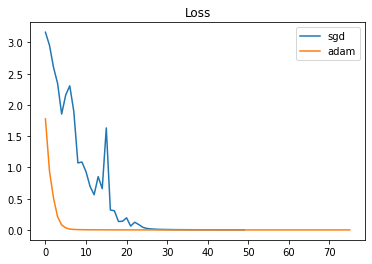

In [99]:
plt.plot(list(range(len(ls_sgd))),ls_sgd,label = "sgd")
plt.plot(list(range(len(ls_adam))),ls_adam,label = "adam")
plt.title("Loss")
plt.legend()
plt.show()

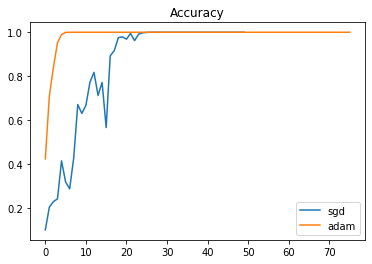

In [100]:
plt.plot(list(range(len(acc_sgd))),acc_sgd,label = "sgd")
plt.plot(list(range(len(acc_adam))),acc_adam,label = "adam")
plt.title("Accuracy")
plt.legend()
plt.show()

In [98]:
# plt.plot(list(range(len(acc_buffer))),acc_buffer)
# plt.title("Accuracy")
# plt.show()